# DFT + CASSCF - DNN Anisotropy - Statistical Analysis

In [1]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Loading data back
df_preds = pd.read_csv(r"C:\Users\henri\OneDrive\Academic\Production\Papers\Em produção\JACS_Tese\Data\predictions.csv").drop("Unnamed: 0", axis=1)

df_Xtest = pd.read_csv(r"C:\Users\henri\OneDrive\Academic\Production\Papers\Em produção\JACS_Tese\Data\X_test.csv").drop("Unnamed: 0", axis=1)

df_Xtrain = pd.read_csv(r"C:\Users\henri\OneDrive\Academic\Production\Papers\Em produção\JACS_Tese\Data\X_train.csv").drop("Unnamed: 0", axis=1)

df_ytest = pd.read_csv(r"C:\Users\henri\OneDrive\Academic\Production\Papers\Em produção\JACS_Tese\Data\y_test.csv").drop("Unnamed: 0", axis=1)

df_ytrain = pd.read_csv(r"C:\Users\henri\OneDrive\Academic\Production\Papers\Em produção\JACS_Tese\Data\y_train.csv").drop("Unnamed: 0", axis=1)

In [3]:
df_preds.columns = ["Prediction D"]
df_ytest.columns = ["True D"]

In [4]:
df_Xtest.columns = ['Coordination number',
 'Spin deviation',
 'SOMO-LUMO gap',
 'SOMO-1-LUMO gap',
 'SOMO-2-LUMO gap',
 'Dipole moment X',
 'Dipole moment Y',
 'Dipole moment Z']

In [5]:
df_stats = pd.concat([df_Xtest['Coordination number'], df_ytest["True D"], df_preds["Prediction D"]], axis=1)

In [6]:
df_stats

,Coordination number,True D,Prediction D
0,-0.392114,55.823673,53.206955
1,0.976381,95.851345,85.703050
2,0.976381,-150.156553,-142.491130
3,0.292134,-179.649782,-173.761280
4,0.292134,-132.125021,-133.340260
...,...,...,...
3053,0.976381,-127.354002,-126.409515
3054,-1.760608,-195.933509,-192.519650
3055,-1.760608,-219.185728,-203.841570
3056,-1.760608,-212.116853,-225.267960


In [7]:
coords = list(df_Xtest["Coordination number"].unique())

In [8]:
sorted(coords)

[-1.760608491199206,
 -1.0763611594102704,
 -0.3921138276213349,
 0.2921335041676006,
 0.9763808359565362]

In [9]:
df_stats.loc[df_stats['Coordination number'] == -1.760608491199206, 'Coordination number'] = 2
df_stats.loc[df_stats['Coordination number'] == -1.0763611594102704, 'Coordination number'] = 3
df_stats.loc[df_stats['Coordination number'] == -0.3921138276213349, 'Coordination number'] = 4
df_stats.loc[df_stats['Coordination number'] == 0.2921335041676006, 'Coordination number'] = 5
df_stats.loc[df_stats['Coordination number'] == 0.9763808359565362, 'Coordination number'] = 6

In [10]:
df_stats

,Coordination number,True D,Prediction D
0,4.0,55.823673,53.206955
1,6.0,95.851345,85.703050
2,6.0,-150.156553,-142.491130
3,5.0,-179.649782,-173.761280
4,5.0,-132.125021,-133.340260
...,...,...,...
3053,6.0,-127.354002,-126.409515
3054,2.0,-195.933509,-192.519650
3055,2.0,-219.185728,-203.841570
3056,2.0,-212.116853,-225.267960


In [11]:
df_stats.sample(n = 25)

,Coordination number,True D,Prediction D
597,6.0,-102.924713,-104.810000
2883,6.0,92.145373,95.688760
2332,2.0,-227.107716,-229.021260
1707,6.0,87.448404,88.421730
2851,6.0,-98.096630,-31.076380
770,6.0,135.134946,140.102950
2086,6.0,91.550283,62.298240
1372,4.0,-67.779853,-64.693360
241,2.0,-155.914264,-161.704210
3035,4.0,-25.881928,-23.799654


Text(0, 0.5, 'Predicted D')

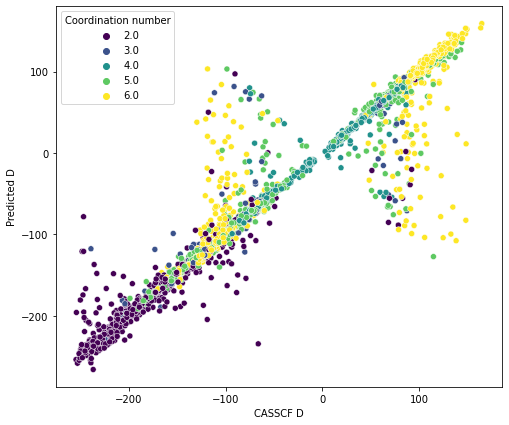

In [12]:
plt.figure(figsize=(8,7))
sns.scatterplot(x="True D", y="Prediction D", data=df_stats, hue="Coordination number", palette="viridis")
plt.xlabel("CASSCF D")
plt.ylabel("Predicted D")

<AxesSubplot:xlabel='True D', ylabel='Prediction D'>

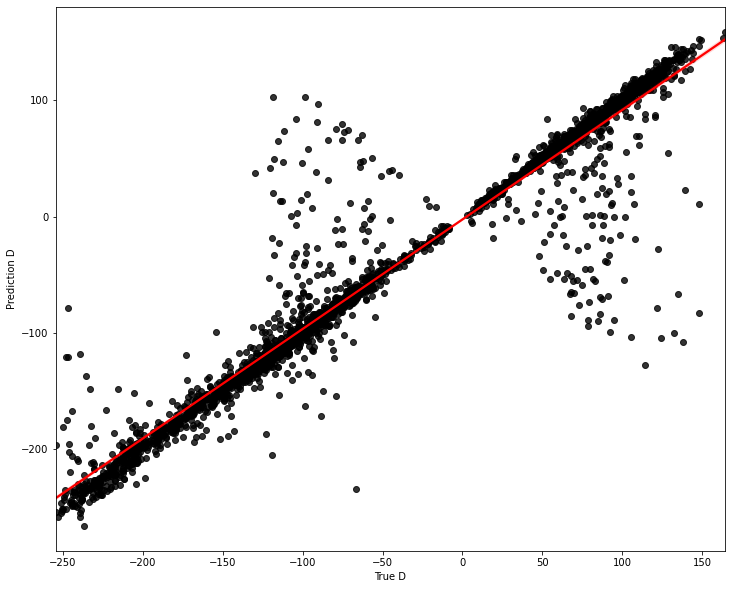

In [13]:
plt.figure(figsize=(12,10))
sns.regplot(x="True D", y="Prediction D", data=df_stats, 
            scatter_kws={"color": "black"},
            line_kws={"color": "red"})

<AxesSubplot:xlabel='Coordination number', ylabel='True D'>

<Figure size 864x720 with 0 Axes>

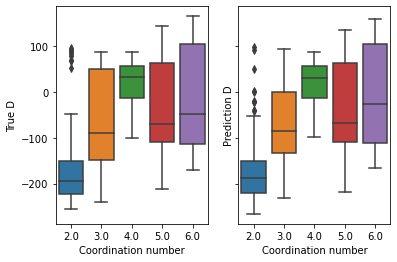

In [14]:
plt.figure(figsize=(12,10))
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="Coordination number", y="Prediction D", data=df_stats, dodge=True, ax=axes[1], orient='v')
sns.boxplot(x="Coordination number", y="True D", data=df_stats, dodge=True, ax=axes[0], orient='v')

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
regr = linear_model.LinearRegression()

In [17]:
mean_squared_error(df_stats["True D"], df_stats["Prediction D"])

885.0158317701533

In [18]:
mean_squared_error(df_stats["True D"], df_stats["Prediction D"])**(1/2)

29.74921564966299

In [19]:
mean_absolute_error(df_stats["True D"], df_stats["Prediction D"])

10.891940928655986

In [20]:
r2_score(df_stats["True D"], df_stats["Prediction D"])

0.9289262850575689

In [21]:
df3.to_pickle("Co_SIM_2plus.pkl")

NameError: name 'df3' is not defined